# EP1
Autores: Carolina Mattos Schuindt e Eric Shimizu Karbstein

Repositório: https://github.com/CosmicGirl42/ProjetoVisaoProcessamentoImagens

Drive: https://drive.google.com/drive/folders/1uPNgBB3V7DapadiagmoBrbFKxJBq8jL2?usp=sharing 

## Instruções
 - 1. Baixe a pasta do drive
 - 2. Clone o Repositório
 - 3. Entre na pasta do Repositório
 - 4. Descompacte a pasta do drive na pasta `db`
 - 6. Abra o arquivo EP1.ipynp com a jupyter-notebook
 - 7. Execute todas as células

In [17]:
%load_ext autoreload
%autoreload 2

# <CLASS>-<ID>-<BACKGROUND>-<HORA>-<LUGAR>-<VERSÂO>

# LIBS
# std libs

import glob
import os
import sys

# external libs
from matplotlib import pyplot
import cv2

# Load path as one up directory
sys.path.append('..')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
def get_files():
    """
    Get all files in the `db` folder and then returns the filename (metadata) and the openned images and the size in bytes.
    """
    files = glob.glob(f"db/original/*")

    zipped_filename_images_size = []

    for file in files:
        zipped_filename_images_size.append((os.path.basename(file).split(".")[0], cv2.imread(file, cv2.IMREAD_GRAYSCALE), os.path.getsize(file)))

    return zipped_filename_images_size

In [19]:
def add_to_env(env, filename, image, size):
    """
    Insert a image to the `env`

    Parameters:
    env: Dict[str, Dict[str, List[Dict[str, str|Image]]]]
    filename: str
    image: Image
    """
    clas, i_d, bg, place, time, version = filename.split("-")


    # Ugh, I just wanted the Rust entry API here, it would reduce the following code to a 4 liner code T-T
    if env.get(clas) == None:
        env[clas] = dict()

    if env[clas].get(i_d) == None:
        env[clas][i_d] = list()

    env[clas][i_d].append({
        "background": bg,
        "time" : time,
        "place" : place,
        "version" : version,
        "size" : size,
        "image" : image,
    })

In [20]:
def print_info(env):
    """
    Print DB info

    Parameters:
    env: Dict[str, Dict[str, List[Dict[str: Any]]]]
    """
    n_classes = len(env)
    n_images = 0
    db_size = 0
    image_col, image_line = (720, 1280)

    classes_info = []
    for clas, dic in env.items():
        bg = set()
        lumen = set()
        total_samples = 0

        for (i_d, xs) in dic.items():
            for item in xs:
                bg.add(item["background"])
                lumen.add(f"{item['time']}+{item['place']}")
                total_samples += 1
                n_images += 1
                db_size += item["size"]
        
        classes_info.append(f"{clas} | {len(dic)} objetos | {len(bg)} variações de fundo {bg} | {len(lumen)} variações de iluminação {lumen} | 3 repetições | {total_samples} amostras")

    # general
    print(f"""===================================

Tabela Global Sumária

Nome do Atributo | Atributo

Número de classes | {n_classes}

Número de imagens | {n_images}

Tamanho da base (bytes) | {db_size / (1024*1024)} MB

Resolução das imagens | {image_line} linhas por {image_col} colunas

=================================

Tabela detalhada por classe
""")

    for i in classes_info:
        print(f"{i}")

    print("=================================")
    

In [44]:
def plot_mnisk(images):
    """
    Plot images in a mnisk like manner.

    Parameters:
    images: List[Image]
    """
    for index, image in enumerate(images):
        if index > 5:
            break
        pyplot.subplot(2, 3, index+1)
        pyplot.imshow(image, cmap=pyplot.get_cmap('gray'))
    
    pyplot.show()

In [22]:
# main
env = {}

files = get_files()

for filename, image, size in files:
    add_to_env(env, filename, image, size)


In [23]:
print_info(env)


Tabela Global Sumária

Nome do Atributo | Atributo

Número de classes | 10

Número de imagens | 1847

Tamanho da base (bytes) | 152.9269142150879 MB

Resolução das imagens | 1280 linhas por 720 colunas


Tabela detalhada por classe

caneca | 10 objetos | 3 variações de fundo {'estampado', 'preto', 'branco'} | 4 variações de iluminação {'dia+dentro', 'dia+fora', 'noite+dentro', 'noite+fora'} | 3 repetições | 352 amostras
caneta | 10 objetos | 3 variações de fundo {'estampado', 'preto', 'branco'} | 4 variações de iluminação {'dia+dentro', 'dia+fora', 'noite+dentro', 'noite+fora'} | 3 repetições | 327 amostras
chave | 10 objetos | 3 variações de fundo {'estampado', 'preto', 'branco'} | 3 variações de iluminação {'dia+fora', 'noite+dentro', 'noite+fora'} | 3 repetições | 150 amostras
faca | 7 objetos | 4 variações de fundo {'estampado', 'branco', 'preto', 'azul'} | 4 variações de iluminação {'dia+dentro', 'dia+fora', 'noite+dentro', 'noite+fora'} | 3 repetições | 244 amostras
chavedefenda

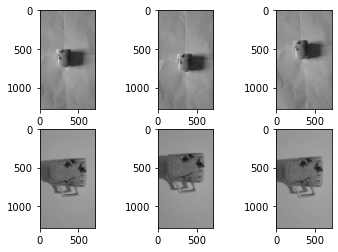

In [45]:
images = [im for _, im, _ in files]
plot_mnisk(images)